In [76]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
columns=['user_id','order_dt','order_product','order_money']
df=pd.read_csv(r'F:\houzi\CDNOW_master.txt',names=columns,sep='\s+')#names指定列名
df.head(5)

,user_id,order_dt,order_product,order_money
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
order_dt         69659 non-null int64
order_product    69659 non-null int64
order_money      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.describe()

,user_id,order_dt,order_product,order_money
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [6]:
#数据类型转换：将数值型转换为时间
df['order_date']=pd.to_datetime(df.order_dt,format='%Y%m%d')
df.head()

,user_id,order_dt,order_product,order_money,order_date
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
2,2,19970112,5,77.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
4,3,19970330,2,20.76,1997-03-30


In [7]:
df['month']=df.order_date.values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_product,order_money,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [8]:
df_grouped=df.groupby('user_id').sum()
df_grouped.head()

,order_dt,order_product,order_money
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [9]:
df_grouped.describe()

,order_dt,order_product,order_money
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


按月的维度细分

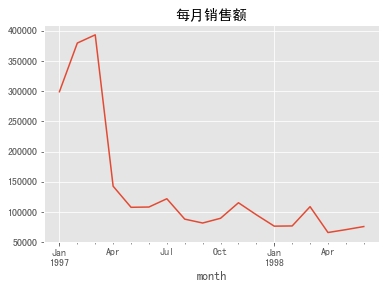

In [10]:
#每个月的销售情况
df.groupby('month').order_money.sum().plot(title='每月销售额')

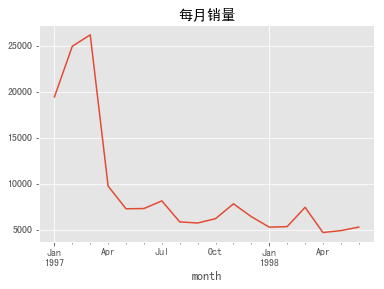

In [11]:
#每月销量
df.groupby('month').order_product.sum().plot(title='每月销量')

Text(0,0.5,'订单金额')

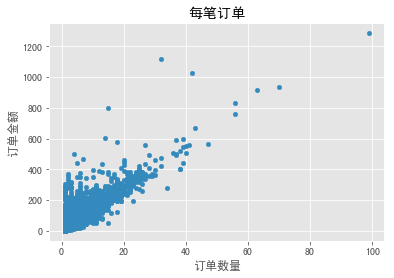

In [23]:
#每笔订单的散点图
df.plot.scatter(x='order_product',y='order_money')
plt.title('每笔订单')
plt.xlabel('订单数量')
plt.ylabel('订单金额')

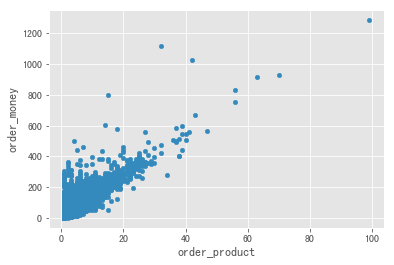

In [20]:
df.plot.scatter(x='order_product',y='order_money')

Text(0,0.5,'订单金额')

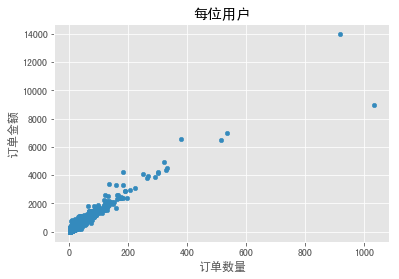

In [22]:
#每位用户的销售散点图
df.groupby('user_id').sum().plot.scatter(x='order_product',y='order_money')
plt.title('每位用户')
plt.xlabel('订单数量')
plt.ylabel('订单金额')

Text(0.5,1,'订单销售额分布')

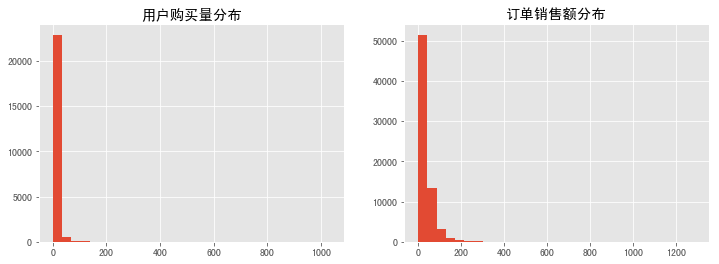

In [15]:
#用直方图表示用户购买额和购买量的分布
plt.figure(figsize=(12,4))
plt.subplot(121)
df.groupby('user_id').order_product.sum().hist(bins=30)#每位用户购买量的分布
plt.title('用户购买量分布')

plt.subplot(122)
df.order_money.hist(bins=30)#每笔订单销售额分布
plt.title('订单销售额分布')

In [25]:
#用户第一次消费时间
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [26]:
#用户最后一次消费时间
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

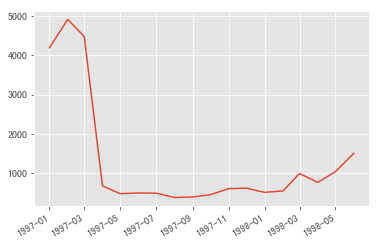

In [27]:
df.groupby('user_id').month.max().value_counts().plot()

回购率和复购率

复购率：在观察时间窗口内消费两次以上的用户占总消费用户比例

In [28]:
#每个用户在每月的订单数
pivoted_df=df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)


pivoted_df.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#转换：消费2次以上记为1，消费1次记为0，消费0次记为NAN  applymap针对dataframe所有数据
pivoted_df_transf=pivoted_df.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_df_transf.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [30]:
pivoted_df_transf.sum()/pivoted_df_transf.count()#没一个月的复购率

month
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

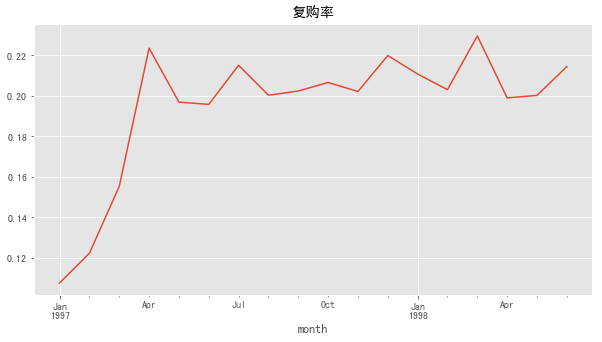

In [31]:
(pivoted_df_transf.sum()/pivoted_df_transf.count()).plot(figsize=(10,5),title='复购率')

新客复购率只有6%，老客复购率维持在20%左右

回购率：在观察的时间窗口内消费的用户，在下一个时间窗口也消费的占比

In [32]:
#每个用户每个月平均消费金额
pivoted_money=df.pivot_table(index='user_id',columns='month',values='order_money',aggfunc='mean').fillna(0)

pivoted_money.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [33]:
#将有消费的记为1，没有消费的记为0
pivoted_purchase=pivoted_money.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [34]:
#如果本月进行消费，下月也进行消费，则记为1；如果下月没有消费，则记为0，若本月没有记为消费，则记为nan
def purchase_return(data):
    status=[]
    for i in range(17):#循环17个月
        if data[i]==1:#若本月消费
            if data[i+1]==1:#下个月也消费
                status.append(1)#就记为1
            if data[i+1]==0:#下个月不消费，就记为0
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return status

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)#axis=1表示计算方向在行的方向上，左右运算
pivoted_purchase_return.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [35]:
pivoted_purchase_return.sum()/pivoted_purchase_return.count()#每个月的回购率

month
1997-01-01    0.147812
1997-02-01    0.174818
1997-03-01    0.186514
1997-04-01    0.301914
1997-05-01    0.337398
1997-06-01    0.318940
1997-07-01    0.277064
1997-08-01    0.297968
1997-09-01    0.305923
1997-10-01    0.339315
1997-11-01    0.311637
1997-12-01    0.274678
1998-01-01    0.307092
1998-02-01    0.366860
1998-03-01    0.251215
1998-04-01    0.318942
1998-05-01    0.299731
1998-06-01         NaN
dtype: float64

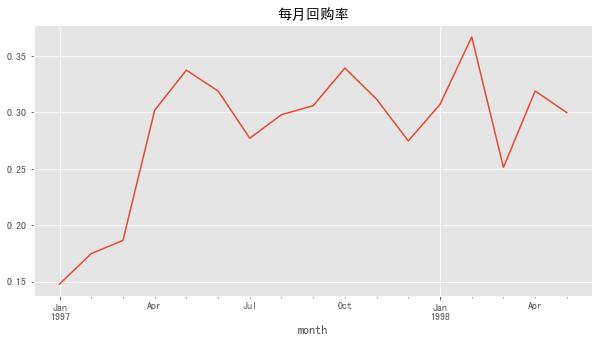

In [38]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,5),title='每月回购率')

新客回购率约为15%，老客回购率在30%左右，综合复购率和回购率，老客户质量高于新客户，老客忠诚度（回购率）较高，消费频次不高，这是用户消费特征。

## 用户分层
新客户：第一次消费

活跃用户：上个时间窗口有消费，本时间窗口有消费

不活跃用户：本时间窗口内没有消费过的老客

回流用户：上一个窗口没有消费，这个窗口有消费的老客

In [39]:
def active_status(data):
    status=[]
    for i in range(18):#遍历18个月
        if data[i]==0:#如果本月没有消费
            if len(status)>0:#前面某月消费过，是老客
                if status[i-1]=='unreg':#前一个月不是首次消费，不是新客
                    status.append('unreg')#则本月也不是新客
                else:
                    status.append('unactive')#前一个月是首次消费，属于新客，则本月为不活跃用户
            else:
                status.append('unreg')#前面某月没有消费过，则本月也不是新客
                
        else:#若本月有消费
            if len(status)==0:#前面没有消费过
                status.append('new')#则为新客
            else:#前面消费过
                if status[i-1]=='unactive':#前一个月没有消费，是不活跃用户
                    status.append('return')#本月为回流用户
                elif status[i-1]=='unreg':#前一个月没有消费，不是新客
                    status.append('new')
                else:#前一个月是首次消费
                    status.append('active')#本月为活跃用户
    return status

pivoted_purchase_status=pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


用户每个月的分层状态

In [40]:
#排除unreg状态、是未来的新客
purchase_status_count=pivoted_purchase_status.replace('unreg',np.nan).apply(lambda x:x.value_counts())
purchase_status_count

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


## 回流占比
回流率为上个月不消费但是在本月消费的老客占总用户的比

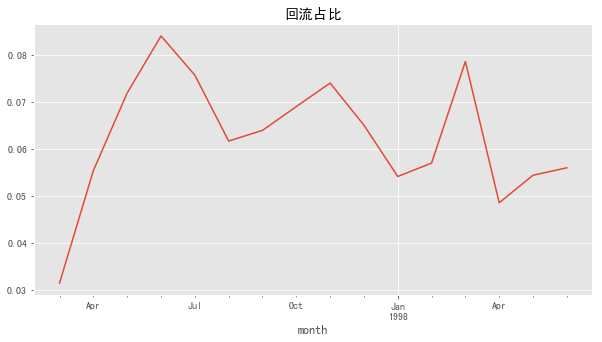

In [41]:
purchase_rate=purchase_status_count.apply(lambda x:x/x.sum(),axis=1)#每一层用户占总用户的比例
purchase_rate.loc['return'].plot(figsize=(10,5),title='回流占比')#回流用户占比，loc选择return行 为图的纵轴

回流占比在5%-8%之间，有下降

## 活跃用户

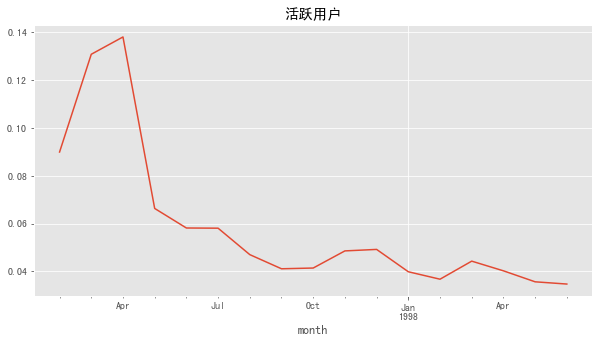

In [42]:
purchase_rate.loc['active'].plot(figsize=(10,5),title='活跃用户')

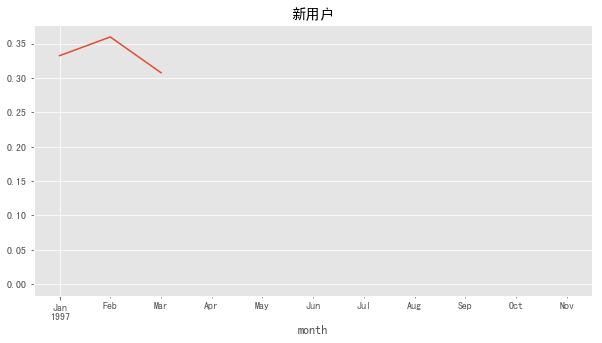

In [45]:
purchase_rate.loc['new'].plot(figsize=(10,5),title='新用户')

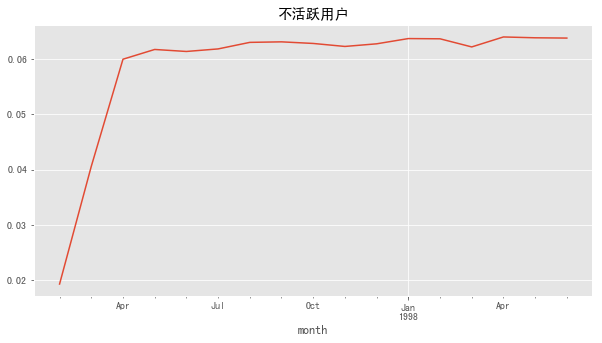

In [44]:
purchase_rate.loc['unactive'].plot(figsize=(10,5),title='不活跃用户')

后面没有新客，所以后面的消费用户都是回流用户和活跃用户，比例为3:2,60%回流用户，40%活跃用户

## 用户质量

In [38]:
user_money=df.groupby('user_id').order_money.sum().sort_values().reset_index()
user_money['money_cumsum']=user_money.order_money.cumsum()
money_total=user_money.money_cumsum.max()
user_money['prop']=user_money.apply(lambda x:x.money_cumsum/money_total,axis=1)#apply用在每个行上
user_money.tail()

,user_id,order_money,money_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


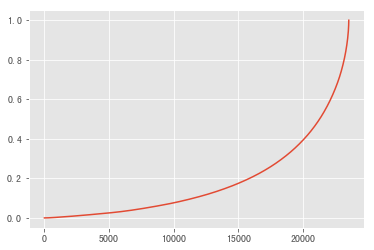

In [39]:
user_money.prop.plot()

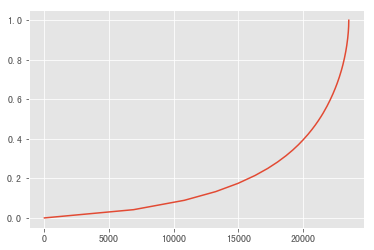

In [42]:
user_product=df.groupby('user_id').order_product.sum().sort_values().reset_index()
user_product['product_cumsum']=user_product.order_product.cumsum()
product_total=user_product.product_cumsum.max()
user_product['prop']=user_product.apply(lambda x:x.product_cumsum/product_total,axis=1)
user_product.prop.plot()

## 用户生命周期

In [46]:
user_purchase=df[['user_id','order_money','order_product','order_date']]
user_date_min=user_purchase.groupby('user_id').order_date.min()
user_date_max=user_purchase.groupby('user_id').order_date.max()
(user_date_max-user_date_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_date, dtype: timedelta64[ns]

In [47]:
(user_date_max-user_date_min).mean()

Timedelta('134 days 20:55:36.987696')

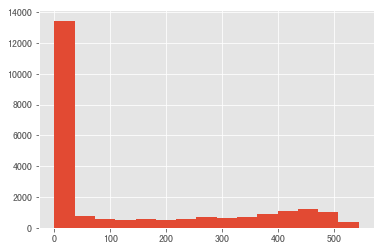

In [48]:
((user_date_max-user_date_min)/np.timedelta64(1,'D')).hist(bins=15)#将timedelta型数据 转换为数值型数据

In [49]:
lifetime=(user_date_max-user_date_min).reset_index()
lifetime.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


In [50]:
lifetime['lifetime']=lifetime.order_date/np.timedelta64(1,'D')
lifetime.head(10)

,user_id,order_date,lifetime
0,1,0 days,0.0
1,2,0 days,0.0
2,3,511 days,511.0
3,4,345 days,345.0
4,5,367 days,367.0
5,6,0 days,0.0
6,7,445 days,445.0
7,8,452 days,452.0
8,9,523 days,523.0
9,10,0 days,0.0


Text(0.5,1,'生命周期分布图')

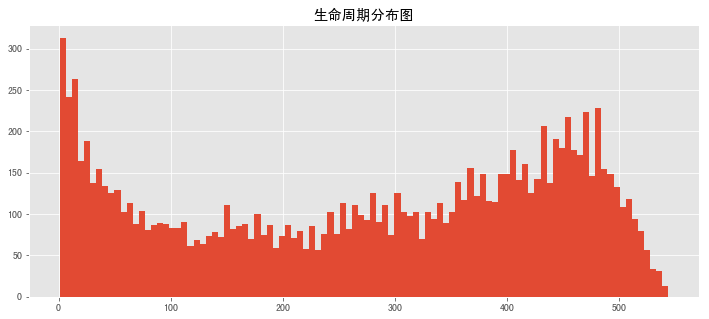

In [56]:
lifetime[lifetime['lifetime']>0].lifetime.hist(bins=100,figsize=(12,5))#除去新客
plt.title('生命周期分布图')

In [50]:
lifetime[lifetime.lifetime>400].lifetime.sum()/lifetime.lifetime.sum()

0.5292126412266761

In [51]:
lifetime[lifetime.lifetime>0].lifetime.mean()

276.0448072247308

## 留存率
第一次消费后，有多少比例第二次消费；留存率偏向于计算第一次消费，有多个时间窗口

In [57]:
user_purchase_retention=pd.merge(left=user_purchase,right=user_date_min.reset_index(),how='inner',on='user_id',suffixes=('','_min'))
user_purchase_retention.head(5)

,user_id,order_money,order_product,order_date,order_date_min
0,1,11.77,1,1997-01-01,1997-01-01
1,2,12.00,1,1997-01-12,1997-01-12
2,2,77.00,5,1997-01-12,1997-01-12
3,3,20.76,2,1997-01-02,1997-01-02
4,3,20.76,2,1997-03-30,1997-01-02


In [58]:
user_purchase_retention['order_date_diff']=user_purchase_retention['order_date']-user_purchase_retention['order_date_min']
user_purchase_retention.head(5)

,user_id,order_money,order_product,order_date,order_date_min,order_date_diff
0,1,11.77,1,1997-01-01,1997-01-01,0 days
1,2,12.00,1,1997-01-12,1997-01-12,0 days
2,2,77.00,5,1997-01-12,1997-01-12,0 days
3,3,20.76,2,1997-01-02,1997-01-02,0 days
4,3,20.76,2,1997-03-30,1997-01-02,87 days


In [59]:
#将timedelta转换为数值型
user_purchase_retention['date_diff']=user_purchase_retention.order_date_diff.apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention.head(10)

,user_id,order_money,order_product,order_date,order_date_min,order_date_diff,date_diff
0,1,11.77,1,1997-01-01,1997-01-01,0 days,0.0
1,2,12.00,1,1997-01-12,1997-01-12,0 days,0.0
2,2,77.00,5,1997-01-12,1997-01-12,0 days,0.0
3,3,20.76,2,1997-01-02,1997-01-02,0 days,0.0
4,3,20.76,2,1997-03-30,1997-01-02,87 days,87.0
5,3,19.54,2,1997-04-02,1997-01-02,90 days,90.0
6,3,57.45,5,1997-11-15,1997-01-02,317 days,317.0
7,3,20.96,4,1997-11-25,1997-01-02,327 days,327.0
8,3,16.99,1,1998-05-28,1997-01-02,511 days,511.0
9,4,29.33,2,1997-01-01,1997-01-01,0 days,0.0


In [60]:
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,bins=bin)
user_purchase_retention.head(10)

,user_id,order_money,order_product,order_date,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,11.77,1,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,12.00,1,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,77.00,5,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,20.76,2,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,20.76,2,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"
5,3,19.54,2,1997-04-02,1997-01-02,90 days,90.0,"(60, 90]"
6,3,57.45,5,1997-11-15,1997-01-02,317 days,317.0,"(180, 365]"
7,3,20.96,4,1997-11-25,1997-01-02,327 days,327.0,"(180, 365]"
8,3,16.99,1,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,29.33,2,1997-01-01,1997-01-01,0 days,0.0,NaN


In [61]:
pivoted_retention=user_purchase_retention.pivot_table(index='user_id',columns='date_diff_bin',values='order_money',aggfunc=sum)
pivoted_retention.head(10)

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,NaN,NaN,30.33,NaN


In [62]:
pivoted_retention.mean()#各时间段的平均消费额

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [63]:
pivoted_retention_trans=pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head(10)

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,1,1
9,0,0,0,0,0,0,1,0


Text(0.5,1,'留存率')

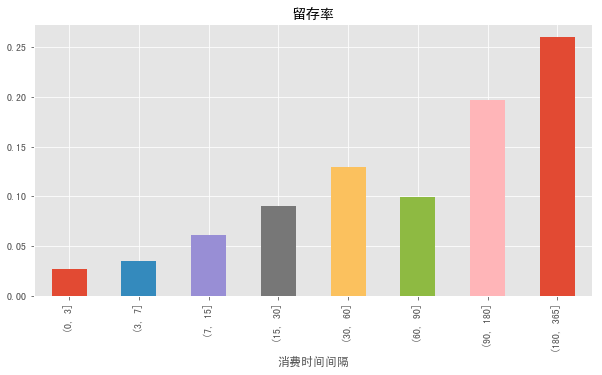

In [67]:
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize=(10,5))#每笔订单离第一笔订单的时间间隔
plt.xlabel('消费时间间隔')
plt.title('留存率')

教育新用户同时，培养忠诚度，在一定时间内召回用户购买

## 用户平均购买周期
计算用户消费间隔，需要用户分组，将上下两次消费时间相减求出消费间隔

In [71]:
def diff(group):
    d=group.date_diff.shift(-1)-group.date_diff
    return d
last_diff=user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10)

user_id   
1        0      NaN
2        1      0.0
         2      NaN
3        3     87.0
         4      3.0
         5    227.0
         6     10.0
         7    184.0
         8      NaN
4        9     17.0
Name: date_diff, dtype: float64

每位用户两次消费间隔

In [61]:
last_diff.mean()

68.97376814424265

用户平均消费间隔为68天

Text(0.5,1,'用户平均购买周期分布')

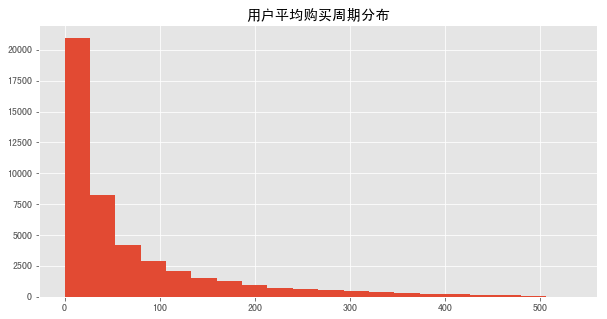

In [75]:
last_diff.hist(figsize=(10,5),bins=20)
plt.title('用户平均购买周期分布')